In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [4]:
df=pd.read_csv("D:/downloads 2/netflix_user_data.csv")

# Convert watch_date to datetime

In [5]:
df['watch_date'] = pd.to_datetime(df['watch_date'])

#  Extract month and day of week

In [6]:
df['month'] = df['watch_date'].dt.month_name()
df['day'] = df['watch_date'].dt.day_name()

#  Top Genres Watched

C:\Users\Sandipan Jana\AppData\Local\Temp\ipykernel_13012\3376874349.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


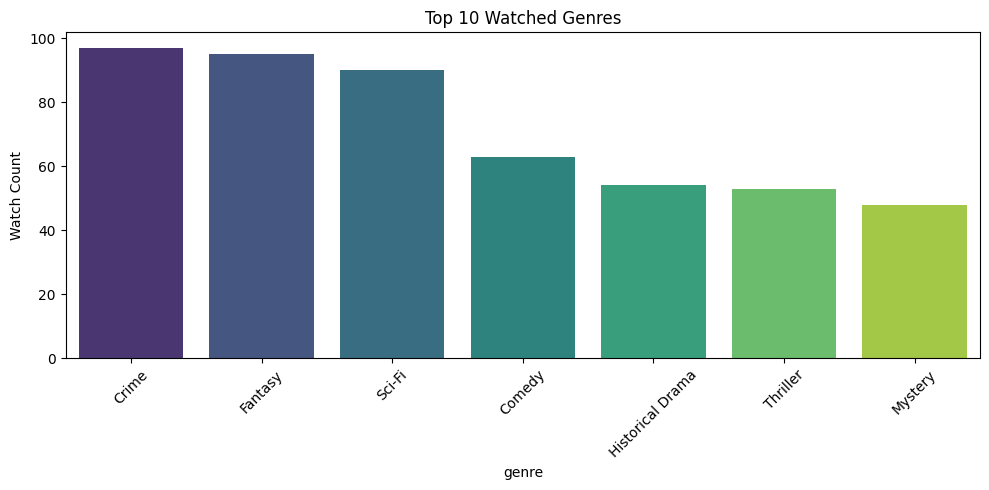

In [7]:
top_genres = df['genre'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title("Top 10 Watched Genres")
plt.ylabel("Watch Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Watch Hours per User

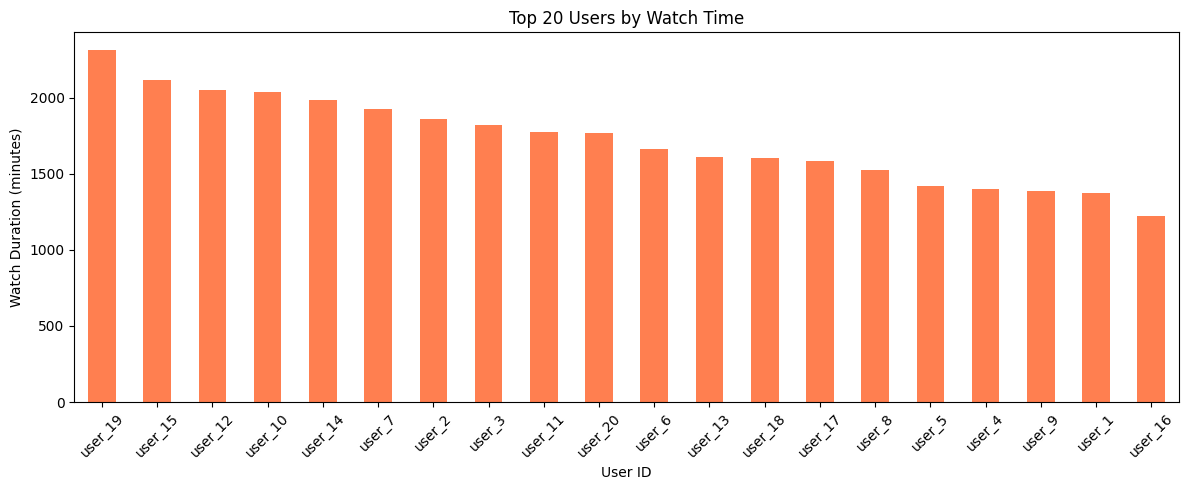

In [9]:

user_watch_time = df.groupby('user_id')['watch_duration_minutes'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
user_watch_time.head(20).plot(kind='bar', color='coral')
plt.title("Top 20 Users by Watch Time")
plt.ylabel("Watch Duration (minutes)")
plt.xlabel("User ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Binge Watching Behavior (Watch Sessions per Day)

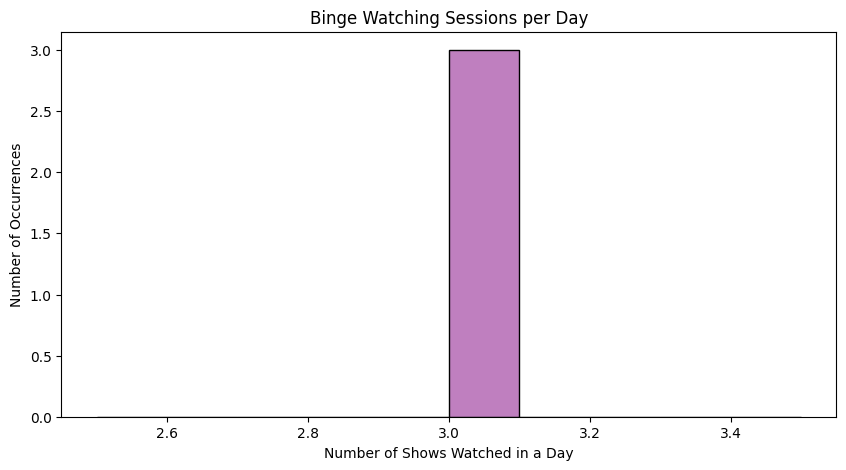

In [10]:

daily_watch = df.groupby(['user_id', 'watch_date']).size().reset_index(name='sessions')
binge_users = daily_watch[daily_watch['sessions'] >= 3]  # assuming 3+ shows/day = binge

plt.figure(figsize=(10,5))
sns.histplot(binge_users['sessions'], bins=10, kde=True, color='purple')
plt.title("Binge Watching Sessions per Day")
plt.xlabel("Number of Shows Watched in a Day")
plt.ylabel("Number of Occurrences")
plt.show()


# Ratings vs Genre

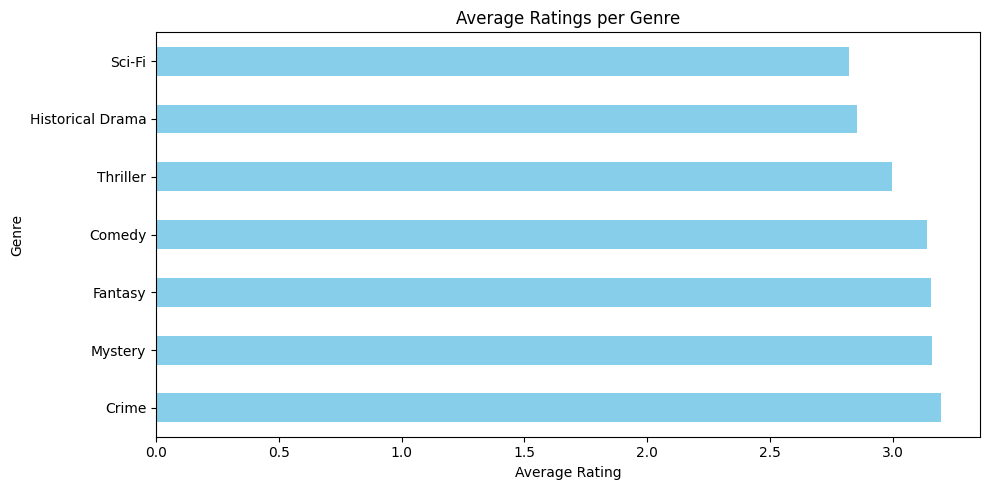

In [11]:

genre_rating = df.groupby('genre')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
genre_rating.plot(kind='barh', color='skyblue')
plt.title("Average Ratings per Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


#  Monthly Trends

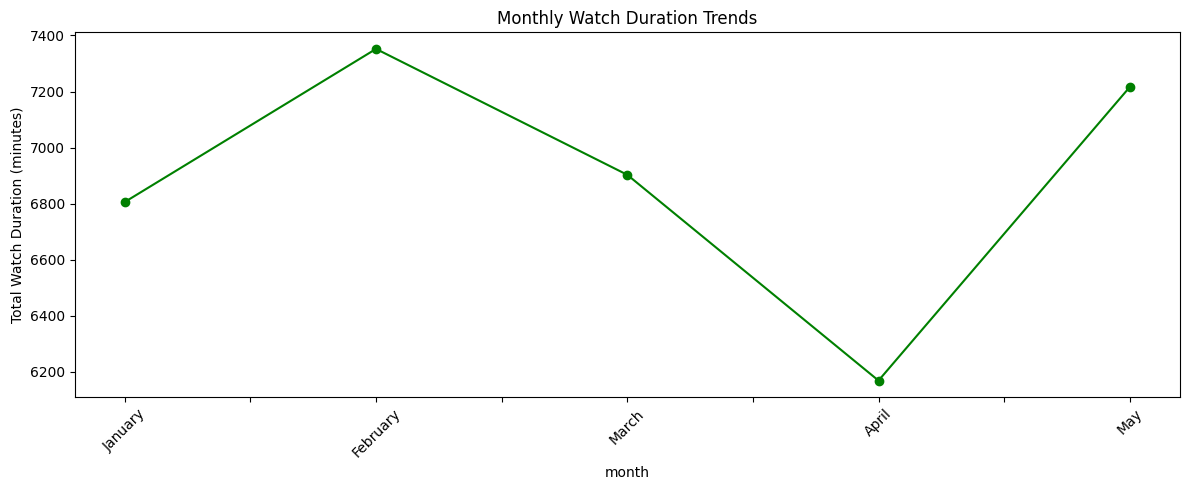

In [12]:
monthly_watch = df.groupby(df['month'])['watch_duration_minutes'].sum()
monthly_watch = monthly_watch.reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'])

plt.figure(figsize=(12,5))
monthly_watch.plot(kind='line', marker='o', color='green')
plt.title("Monthly Watch Duration Trends")
plt.ylabel("Total Watch Duration (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
